[View in Colaboratory](https://colab.research.google.com/github/ucalyptus/Spotify-Recommendation-Engine/blob/master/Spotify_Recommendation_System_.ipynb)

In [1]:
!pip install spotipy

Client ID ffbef2bcb4b84e80b3a0039a2906cb01

Client Secret 6c57daa1247f4abe96f38635d38869a0

Redirect URI https://developer.spotify.com/dashboard/applications/ffbef2bcb4b84e80b3a0039a2906cb01

In [0]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util

In [0]:
cid = 'ffbef2bcb4b84e80b3a0039a2906cb01'
secret = '6c57daa1247f4abe96f38635d38869a0'
username = 'francocasadei'
redirect_uri = 'https://developer.spotify.com/dashboard/applications/ffbef2bcb4b84e80b3a0039a2906cb01'


In [0]:
scope = 'user-library-read playlist-modify-public playlist-read-private'

client_credentials_manager = SpotifyClientCredentials(client_id = cid, client_secret=secret)

sp = spotipy.Spotify(client_credentials_manager= client_credentials_manager)

token = util.prompt_for_user_token(username,scope,cid,secret,redirect_uri)

if token:
  sp = spotipy.Spotify(auth=token)
  
else:
  print("Can't get token for", username)

In [0]:
import pandas as pd

#https://open.spotify.com/user/francocasadei/playlist/6aWL6tZgIycyz98WgigfsG
sourcePlaylistID = '6aWL6tZgIycyz98WgigfsG'
sourcePlaylist = sp.user_playlist(username,sourcePlaylistID);
tracks = sourcePlaylist["tracks"];
songs = tracks["items"];

track_ids = []
track_names = []


for i in range(0, len(songs)):
  if songs[i]['track']['id']!=None:
    track_ids.append(songs[i]['track']['id'])
    track_names.append(songs[i]['track']['name'])
    
features = []


for i in range(0,len(track_ids)):
  audio_features  = sp.audio_features(track_ids[i])
  for track in audio_features:
    features.append(track)
    
    
playlist_df = pd.DataFrame(features,index = track_names)

In [0]:
#francocasadei@yahoo.it:astrolabio

In [0]:
playlist_df = playlist_df[["id", "acousticness", "danceability", "duration_ms", "energy", "instrumentalness",  "key", "liveness", "loudness", "mode", "speechiness", "tempo", "valence"]]

In [8]:
playlist_df.shape

(24, 13)

In [0]:
playlist_df['ratings']=[10, 9, 9, 10, 8, 6, 8, 4, 3, 5, 7, 5, 5, 8, 8,10,4,6,8,2,4,5,6,9]

In [10]:
playlist_df

id  acousticness  \
Losers                            1bAvtmTl0F9loyz9AwPwp7       0.03550   
Tell Your Friends                 1mhVXWduD8ReDwusfaHNwU       0.26500   
Often                             4PhsKqMdgMEUSstTDAmMpg       0.21800   
The Hills                         7fBv7CLKzipRk6EC6TWHOB       0.06710   
Acquainted                        7uJH0YdSZL6psjxI6Xy08b       0.48400   
Can't Feel My Face                22VdIZQfgXJea34mQxlt81       0.11200   
Shameless                         6C6fHTuFUxVtJpBOOaMvJr       0.14600   
Earned It (Fifty Shades Of Grey)  4frLb7nWtsz2ymBE6k2GRP       0.40800   
In The Night                      25KybV9BOUlvcnv7nN3Pyo       0.07960   
As You Are                        3H3qBumaYj67PT3aMEBvAP       0.13100   
Dark Times                        6J7PIkhtHwmFjPLq0SyuPj       0.11400   
Prisoner                          1gZADNt16Oh23jWyMYRk4p       0.44100   
Angel                             0wzPHTgOtFIDhk2rD3Au4x       0.10500   
Switch                            29ZZAShKhwRUuKULSNtxX6       0.04270   
OTW                               6Hgh47WXVKtXN5zGOu0hjI       0.18300   
Real Life                         03j354P848KtNU2FVSwkDG       0.43800   
Pretty                            0ei3uNcwJOiUocuks1vWcb       0.03490   
Hotline Bling                     0wwPcA6wtMf6HUMpIRdeP7       0.00302   
The Morning                       6u0dQik0aif7FQlrhycG1L       0.31700   
High For This                     5fohLPNqO6TqwrZ7BoUWUT       0.74400   
Wicked Games                      6VwBbL8CzPiC4QV66ay7oR       0.00959   
Kiss Land                         5idmfDT06TjCQ1SPDsa5qh       0.04910   
Desire - Gryffin Remix            6JzCO4ZzxAXhY86vTcqM1Q       0.06060   
King                              5Z3zRrMIJk7CVpfcLsM9wD       0.05940   

                                  danceability  duration_ms  energy  \
Losers                                   0.666       281147   0.485   
Tell Your Friends                        0.565       334333   0.454   
Often                                    0.569       249040   0.629   
The Hills                                0.580       242253   0.565   
Acquainted                               0.372       348853   0.477   
Can't Feel My Face                       0.705       213520   0.769   
Shameless                                0.603       253507   0.562   
Earned It (Fifty Shades Of Grey)         0.647       277680   0.291   
In The Night                             0.505       235653   0.680   
As You Are                               0.371       340493   0.329   
Dark Times                               0.501       260640   0.403   
Prisoner                                 0.550       274960   0.404   
Angel                                    0.626       377347   0.583   
Switch                                   0.664       207071   0.664   
OTW                                      0.652       263014   0.678   
Real Life                                0.581       223373   0.653   
Pretty                                   0.581       375400   0.691   
Hotline Bling                            0.903       267067   0.621   
The Morning                              0.652       312427   0.549   
High For This                            0.465       247227   0.403   
Wicked Games                             0.658       323747   0.591   
Kiss Land                                0.326       455333   0.862   
Desire - Gryffin Remix                   0.543       268840   0.876   
King                                     0.560       215360   0.857   

                                  instrumentalness  key  liveness  loudness  \
Losers                                    0.000603    0    0.5040    -9.850   
Tell Your Friends                         0.000000    1    0.1810   -11.091   
Often                                     0.000000    7    0.1350    -9.837   
The Hills                                 0.000000    0    0.1350    -7.065   
Acquainted                      

In [0]:
X_train = playlist_df.drop(['id', 'ratings'], axis=1)
y_train = playlist_df['ratings']

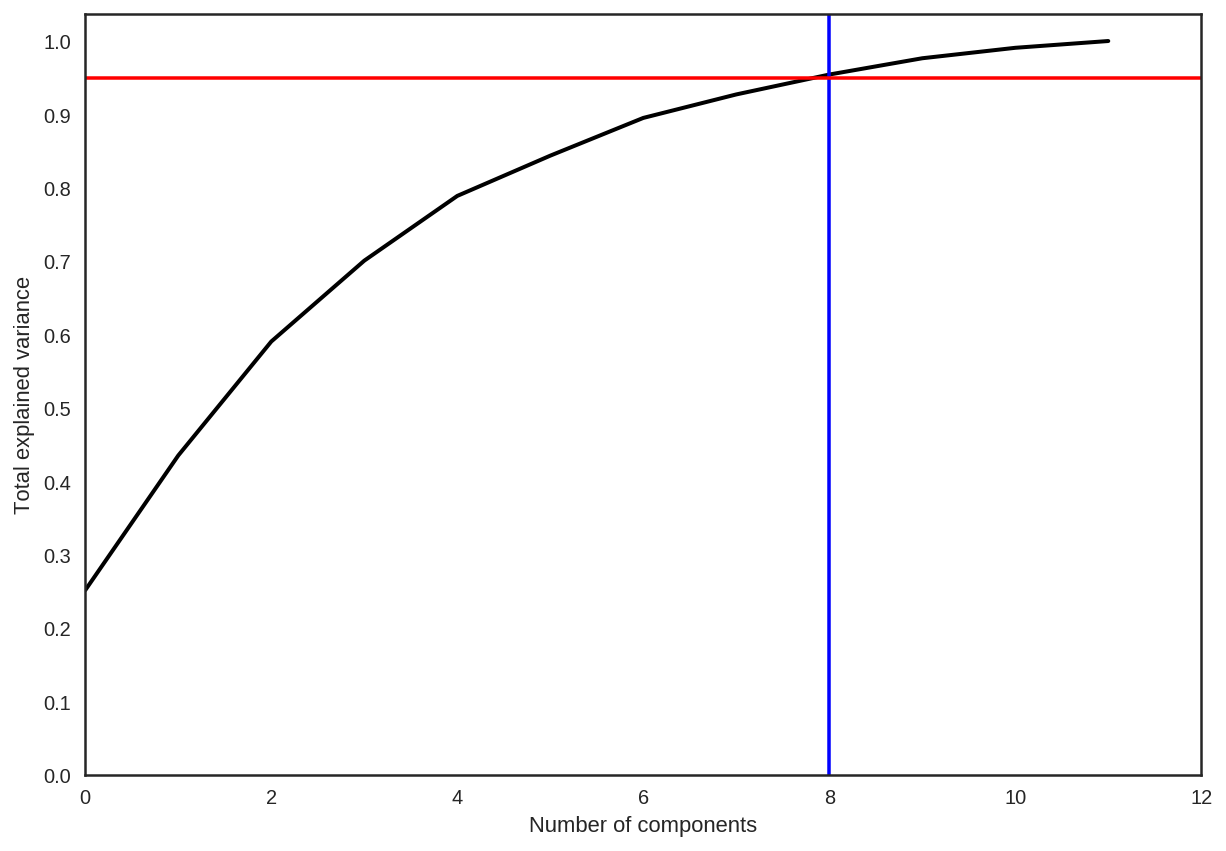

In [12]:
import numpy as np
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

X_scaled = StandardScaler().fit_transform(X_train)

pca = decomposition.PCA().fit(X_scaled)


plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='k',lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0,12)
plt.yticks(np.arange(0,1.1,0.1))
plt.axvline(8,c='b')
plt.axhline(0.95,c='r')
plt.show();

In [0]:
# Fit your dataset to the optimal pca
pca = decomposition.PCA(n_components=8)
X_pca = pca.fit_transform(X_scaled)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer(sublinear_tf = True, ngram_range=(1,6),
                   max_features=10000)
X_names_sparse=v.fit_transform(track_names)
X_names_sparse.shape

(24, 90)

In [0]:
from scipy.sparse import csr_matrix, hstack

X_train_last = csr_matrix(hstack([X_pca, X_names_sparse]))

In [0]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

skf = StratifiedKFold(n_splits=2,shuffle=True,random_state=42)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn_params = {'n_neighbors':range(1,10)}
knn = KNeighborsClassifier(n_jobs=-1)

knn_grid= GridSearchCV(knn,knn_params,cv=skf,n_jobs =-1,verbose=True)
knn_grid.fit(X_train_last,y_train)
knn_grid.best_params_, knn_grid.best_score_

Fitting 2 folds for each of 9 candidates, totalling 18 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, set

({'n_neighbors': 1}, 0.25)

In [ ]:
# PCA+SVM
sc = StandardScaler()   
X_train = sc.fit_transform(X_train) 
from sklearn.decomposition import PCA 
pca = PCA(n_components = 7) 
X_train = pca.fit_transform(X_train) 
from sklearn import svm
base_estimator = svm()
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
svm_grid = GridSearchCV(base_estimator, param_grid, refit = True, verbose = 3) 
svm_grid.fit(X_train, y_train) 
svm_grid.best_estimator_ , svm_grid.best_score_

In [18]:
from sklearn.ensemble import RandomForestClassifier
parameters = {'max_features':[4,7,8,10],'min_samples_leaf':[1,3,5,8],'max_depth':[3,5,8]}
rfc = RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=-1,oob_score=True)
forest_grid = GridSearchCV(rfc,parameters,n_jobs=-1,cv=skf,verbose=1)
forest_grid.fit(X_train_last,y_train)
forest_grid.best_estimator_ , forest_grid.best_score_

Fitting 2 folds for each of 48 candidates, totalling 96 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:   22.7s finished


(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=8, max_features=10, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
             oob_score=True, random_state=42, verbose=0, warm_start=False),
 0.375)

In [19]:
from sklearn.tree import DecisionTreeClassifier

tree= DecisionTreeClassifier()

tree_params = {'max_depth':range(1,11),'max_features':range(4,19)}
tree_grid = GridSearchCV(tree,tree_params,cv=skf,n_jobs=-1,verbose=True)
tree_grid.fit(X_train_last,y_train)
tree_grid.best_estimator_ , tree_grid.best_score_

Fitting 2 folds for each of 150 candidates, totalling 300 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.7s finished


(DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
             max_features=17, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'), 0.4583333333333333)

In [20]:
rec_tracks=[]

for i in playlist_df['id'].values.tolist():
  rec_tracks += sp.recommendations(seed_tracks=[i],limit = int(len(playlist_df)/2))['tracks'];
  

rec_track_ids=[]
rec_track_names = []
for i in rec_tracks:
  rec_track_ids.append(i['id'])
  rec_track_names.append(i['name'])
  

rec_features=[]

for i in range(0,len(rec_track_ids)):
  rec_audio_features = sp.audio_features(rec_track_ids[i])
  for track in rec_audio_features:
    rec_features.append(track)
    
    
rec_playlist_df= pd.DataFrame(rec_features,index = rec_track_ids)

retrying ...1secs
retrying ...1secs
retrying ...7secs
retrying ...1secs
retrying ...7secs
retrying ...1secs


In [0]:
rec_playlist_df = rec_playlist_df[["acousticness", "danceability", "duration_ms", "energy", "instrumentalness",  "key", "liveness", "loudness", "mode", "speechiness", "tempo", "valence"]]

In [0]:
tree_grid.best_estimator_.fit(X_train_last,y_train)
rec_playlist_df_scaled = StandardScaler().fit_transform(rec_playlist_df)
X_test_pca  = pca.transform(rec_playlist_df_scaled)
X_test_names = v.transform(rec_track_names)
X_test_last = csr_matrix(hstack([X_test_pca,X_test_names]))
y_pred_class = tree_grid.best_estimator_.predict(X_test_last)

In [0]:
rec_playlist_df['ratings']=y_pred_class
rec_playlist_df = rec_playlist_df.sort_values('ratings',ascending=False)
rec_playlist_df = rec_playlist_df.reset_index()

recs_to_add = rec_playlist_df[rec_playlist_df['ratings']>=9]['index'].values.tolist()

In [0]:
playlist_recs =sp.user_playlist_create(username,name='PCA + tf-idf + DT - Recommended Songs for Playlist - {}'.format(sourcePlaylist['name']))

In [25]:
playlist_recs

{'collaborative': False,
 'description': None,
 'external_urls': {'spotify': 'https://open.spotify.com/playlist/4D8p3hVYwgngTmf1FHol0Y'},
 'followers': {'href': None, 'total': 0},
 'href': 'https://api.spotify.com/v1/playlists/4D8p3hVYwgngTmf1FHol0Y',
 'id': '4D8p3hVYwgngTmf1FHol0Y',
 'images': [],
 'name': 'PCA + tf-idf + DT - Recommended Songs for Playlist - bantai',
 'owner': {'display_name': 'francocasadei',
  'external_urls': {'spotify': 'https://open.spotify.com/user/francocasadei'},
  'href': 'https://api.spotify.com/v1/users/francocasadei',
  'id': 'francocasadei',
  'type': 'user',
  'uri': 'spotify:user:francocasadei'},
 'primary_color': None,
 'public': True,
 'snapshot_id': 'MSxlNTJiYzUxNmUyNTU4ODMyYThkYjMwMWVmMjVjODg5OTYyMWE1N2Qz',
 'tracks': {'href': 'https://api.spotify.com/v1/playlists/4D8p3hVYwgngTmf1FHol0Y/tracks',
  'items': [],
  'limit': 100,
  'next': None,
  'offset': 0,
  'previous': None,
  'total': 0},
 'type': 'playlist',
 'uri': 'spotify:user:francocasadei:p

In [0]:
sp.user_playlist_add_tracks(username,playlist_recs['id'],recs_to_add);